<a href="https://colab.research.google.com/github/2403A52058/ML_LAB_ASSIGNMENTS/blob/main/ML_LAB(09)_2403A52058_S_KOUSHIK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
K-Nearest Neighbors (KNN) - Heart Disease Classification

This cell imports all necessary libraries for:
- Data handling
- Visualization
- Model training
- Model evaluation
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
"""
Load the Heart Disease dataset.

Make sure you upload 'heart.csv' to Colab before running this cell.
"""

# Load dataset
df = pd.read_csv('/content/heart_disease_uci.csv')

# Display first 5 rows
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
"""Data Preprocessing:

1. Check missing values
2. Separate features (X) and target (y)
3. Handle missing values
4. Encode categorical features
5. Train-test split
6. Feature scaling (important for KNN)
"""

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Features and target
X = df.drop('num', axis=1)  # Independent variables
y = df['num']               # Target variable

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Handle missing values - Impute with mean for numerical, mode for categorical
for col in numerical_cols:
    if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].mean())

for col in categorical_cols:
    if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].mode()[0])

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling (VERY important for KNN because it uses distance)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing completed.")

Missing Values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
Data preprocessing completed.


/tmp/ipython-input-1972437000.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[col] = X[col].fillna(X[col].mode()[0])


In [ ]:
"""
Train KNN Classifier for different k values:
k = 3, 5, 7, 11, 15

Evaluate using:
- Accuracy
- Precision
- Recall
- F1-score
"""

k_values = [3, 5, 7, 11, 15]

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for k in k_values:

    # Initialize KNN model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train model
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    accuracy_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)

    print(f"\nResults for k = {k}")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)


Results for k = 3
Accuracy : 0.5978260869565217
Precision: 0.5421198662419068
Recall   : 0.5978260869565217
F1-score : 0.5621540336933966

Results for k = 5
Accuracy : 0.6141304347826086
Precision: 0.5720805973479536
Recall   : 0.6141304347826086
F1-score : 0.5908577791723748

Results for k = 7
Accuracy : 0.6358695652173914
Precision: 0.5872659534894207
Recall   : 0.6358695652173914
F1-score : 0.6070657982964542

Results for k = 11
Accuracy : 0.6086956521739131
Precision: 0.5536776233277593
Recall   : 0.6086956521739131
F1-score : 0.5770784062911481

Results for k = 15
Accuracy : 0.5597826086956522
Precision: 0.5020502966724594
Recall   : 0.5597826086956522
F1-score : 0.5282177290598876


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

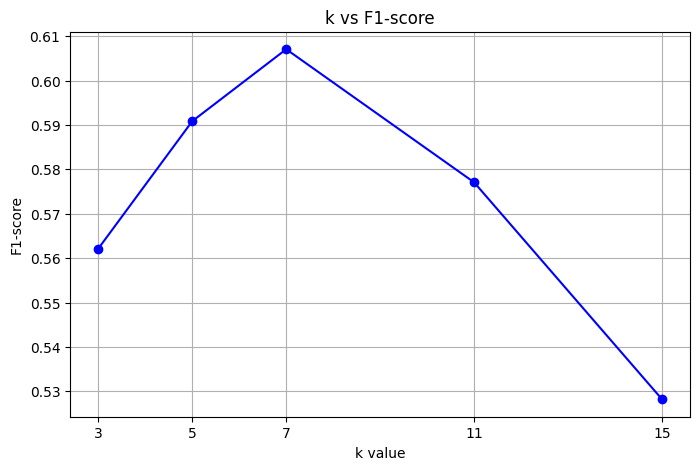

In [ ]:
"""
Plot k values against F1-score to analyze performance trend.
"""

plt.figure(figsize=(8,5))
plt.plot(k_values, f1_list, marker='o', linestyle='-', color='blue')

plt.title("k vs F1-score")
plt.xlabel("k value")
plt.ylabel("F1-score")
plt.xticks(k_values)
plt.grid(True)

plt.show()

In [ ]:
"""
Create a summary table of evaluation metrics.
"""

results_df = pd.DataFrame({
    'k': k_values,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-score': f1_list
})

results_df

,k,Accuracy,Precision,Recall,F1-score
0,3,0.597826,0.542120,0.597826,0.562154
1,5,0.614130,0.572081,0.614130,0.590858
2,7,0.635870,0.587266,0.635870,0.607066
3,11,0.608696,0.553678,0.608696,0.577078
4,15,0.559783,0.502050,0.559783,0.528218
